<a href="https://colab.research.google.com/github/Jasxpreet/Data-Science-Assignments/blob/main/Deep_Learning_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: CNN for Image Classification

---

**Task 1:** Train a CNN on a Subset of the CIFAR-10 Dataset



*   Implement a CNN model using TensorFlow (Keras API) on a subset of the CIFAR-10 dataset.  
*   Use only 10% of the dataset for training and testing.

*   Perform the following steps:

  1. Load and preprocess the CIFAR-10 dataset:
     
      *   Use only 10% of the data (randomly sampled).
      *   Normalize pixel values.

      *   One-hot encode labels.

  2. Define a CNN architecture:

      *   Conv Layer 1: 32 filters, 3×3 kernel, ReLU activation
      *   Max Pooling Layer: 2×2 pool size
      *   Conv Layer 2: 64 filters, 3×3 kernel, ReLU activation
      *   Max Pooling Layer: 2×2 pool size
      *   Flatten Layer
      *   Fully Connected Layer (Dense): 128 neurons, ReLU activation
      *   Dropout Layer: Dropout (0.5) to prevent overfitting
      *   Output Layer: 10 neurons, Softmax activation

  3.  Apply Data Augmentation:

      *   Use image flipping, rotation, and brightness adjustments to improve model generalization.
  4. Compile and train the model:

      *   Optimizer: Adam
      *   Loss Function: Categorical cross-entropy
      *   Batch size: 32
      *   Epochs: 10
  5. Evaluate the model on the test dataset and report:
      *   Accuracy
      *   Confusion Matrix
  6. Predict some test images and display their predicted labels.




---



**EDA**

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 892.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input,BatchNormalization,MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
print(y_train[0])

[6]


In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

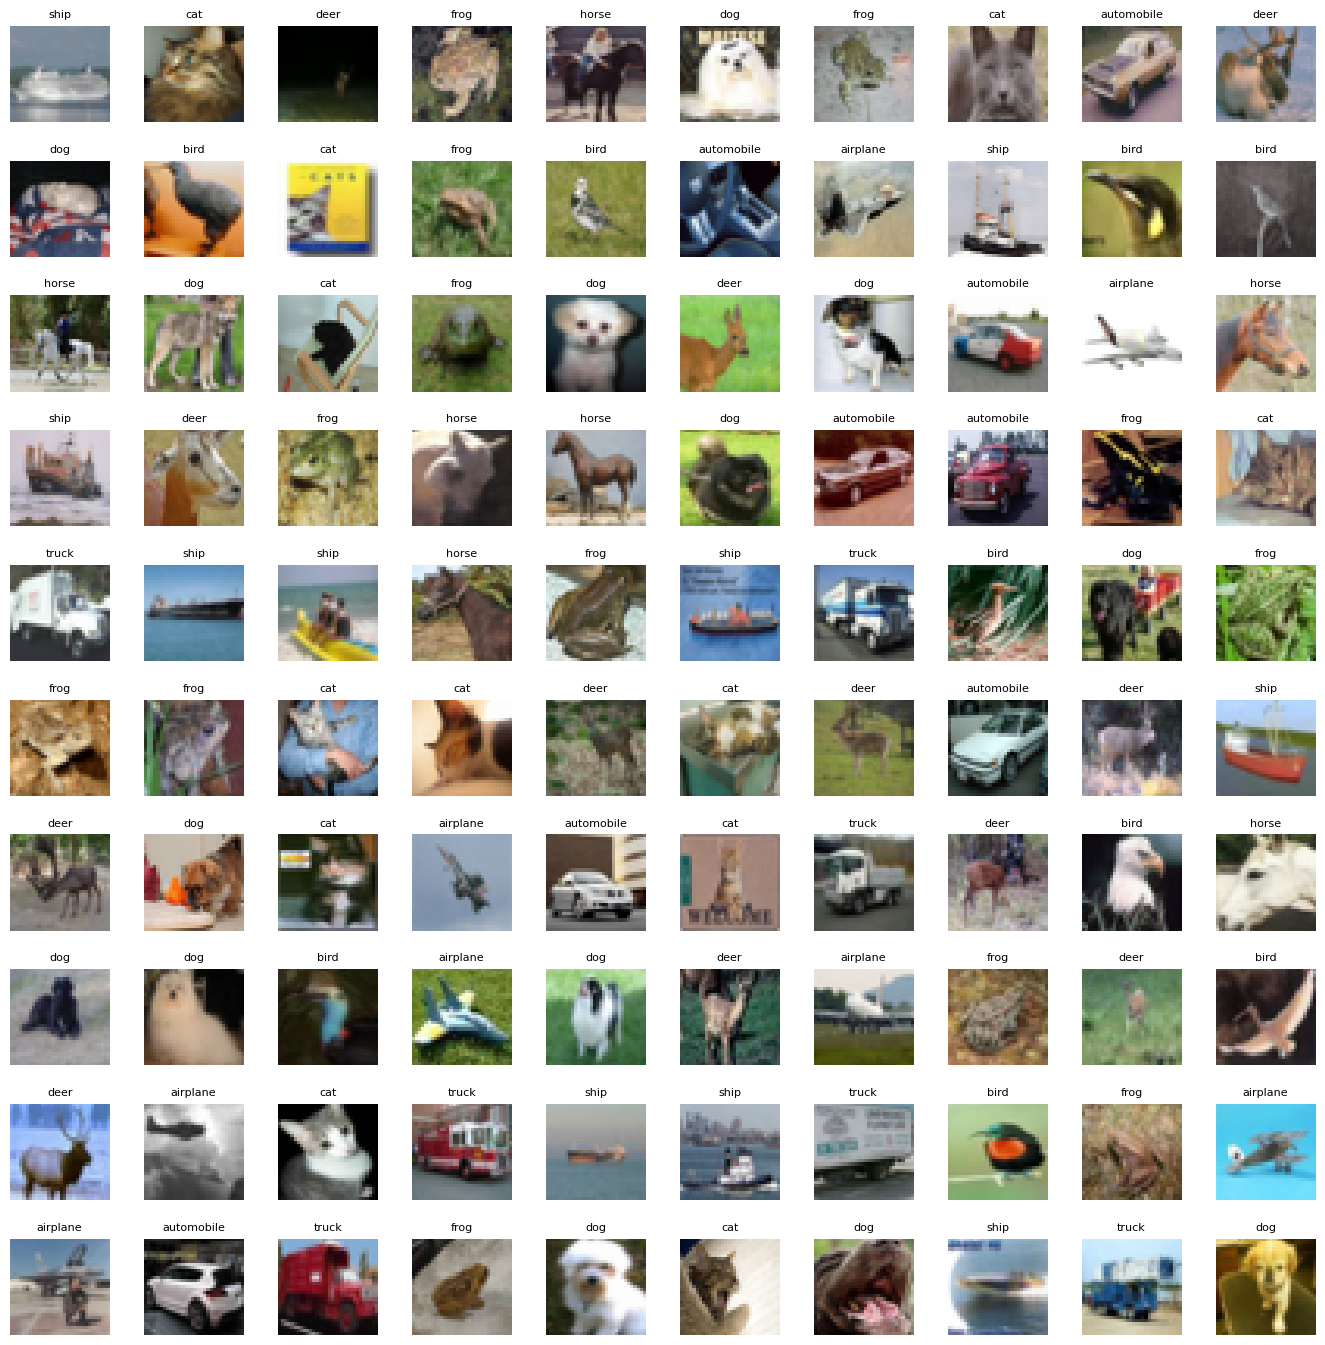

In [ ]:
W_grid = 10
L_grid = 10
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_train = len(X_train)
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index].item())
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

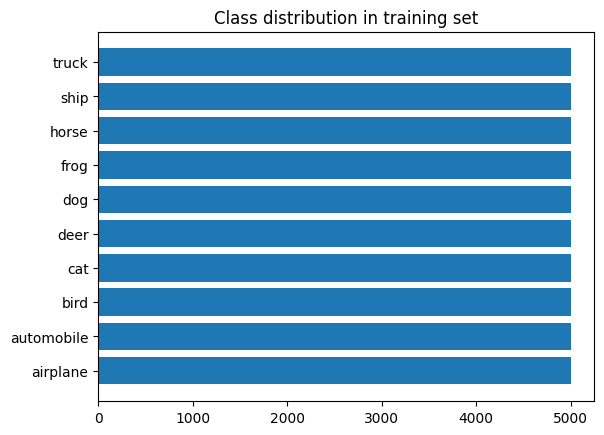

In [ ]:
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(labels, counts)
plt.title('Class distribution in training set')

In [ ]:
#Normalization
X_train,X_test=X_train/255,X_test/255

In [ ]:
#One-hot encode labels
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

**Model Training**

In [ ]:
X_train_reduced,_,y_train_reduced,_=train_test_split(X_train,y_train,test_size=0.9,random_state=42,stratify=y_train,shuffle=True)
X_test_reduced,_,y_test_reduced,_=train_test_split(X_test,y_test,test_size=0.9,random_state=42,stratify=y_test,shuffle=True)

In [ ]:
model=Sequential(
    [
        Input(shape=(32,32,3)),
        Conv2D(32,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128,activation='relu'),
        Dropout(0.5),
        Dense(10,activation='softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size=32
datagen=ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_generator_reduced=datagen.flow(X_train_reduced,y_train_reduced,batch_size=batch_size)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
r_reduced = model.fit(train_generator_reduced,
              epochs=10,
              validation_data=(X_test_reduced, y_test_reduced),
#               callbacks=[early_stop]
             )

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.1606 - loss: 2.2195 - val_accuracy: 0.3020 - val_loss: 1.9275
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.2724 - loss: 1.9574 - val_accuracy: 0.3450 - val_loss: 1.8512
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.3159 - loss: 1.8656 - val_accuracy: 0.3870 - val_loss: 1.6768
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.3518 - loss: 1.7345 - val_accuracy: 0.4320 - val_loss: 1.5763
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.3798 - loss: 1.6694 - val_accuracy: 0.4610 - val_loss: 1.4869
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.3979 - loss: 1.6221 - val_accuracy: 0.4670 - val_loss: 1.4519
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.4284 - loss: 1.5557 - val_accuracy: 0.4560 - val_loss: 1.4327
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.4321 - loss: 1.5512 - val_accuracy: 0.490

In [ ]:
loss, accuracy = model.evaluate(X_test_reduced, y_test_reduced)
print(f'Test Accuracy with 10% Accuracy: {accuracy*100:.2f}%')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4917 - loss: 1.3760
Test Accuracy with 10% Accuracy: 50.00%


Text(0.5, 1.0, 'Accuracy evolution')

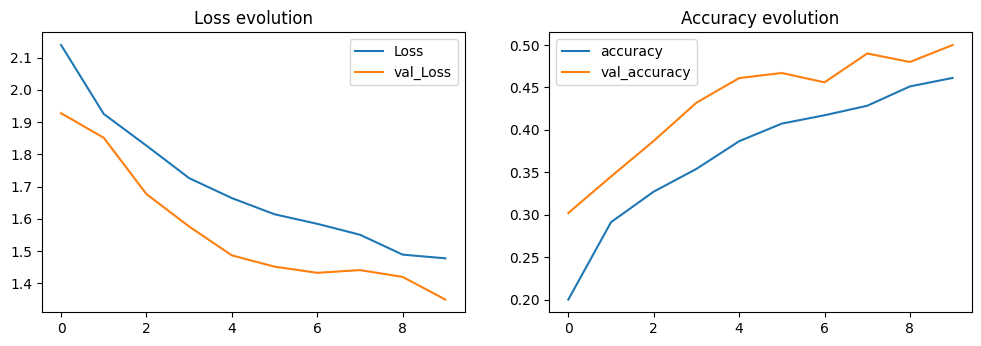

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r_reduced.history['loss'], label='Loss')
plt.plot(r_reduced.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r_reduced.history['accuracy'], label='accuracy')
plt.plot(r_reduced.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


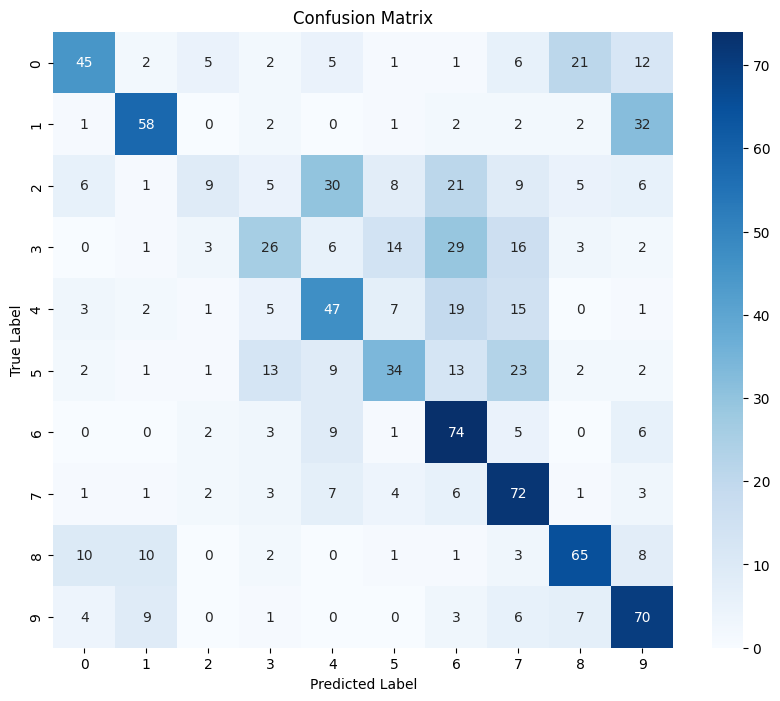

In [ ]:
y_pred_reduced = model.predict(X_test_reduced)
y_pred_classes = np.argmax(y_pred_reduced, axis=1)
y_true_reduced = np.argmax(y_test_reduced, axis=1)
cm = confusion_matrix(y_true_reduced, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def plot_predictions(x_test, y_true, y_pred_classes, class_names):
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    axes = axes.ravel()
    for i in range(9):
        idx = np.random.randint(0, len(X_test_reduced))
        axes[i].imshow(x_test[idx])
        axes[i].set_title(f'True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()


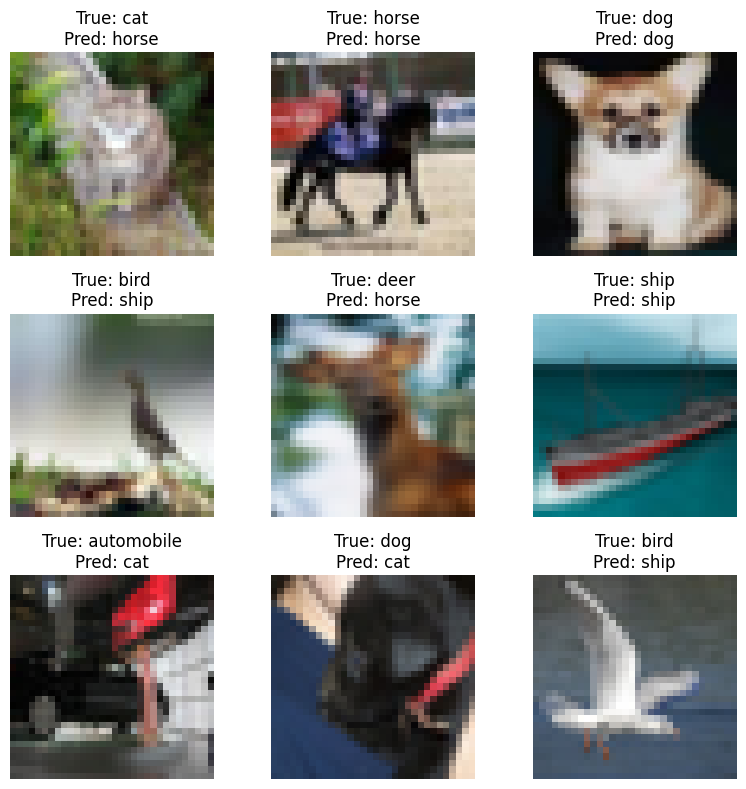

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_predictions(X_test_reduced, y_true_reduced, y_pred_classes, class_names)

**With whole dataset**

In [ ]:
model=Sequential(
    [
        Input(shape=(32,32,3)),
        Conv2D(32,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128,activation='relu'),
        Dropout(0.5),
        Dense(10,activation='softmax')
    ]
)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_generator=datagen.flow(X_train,y_train,batch_size=batch_size)
early_stop=EarlyStopping(monitor='val_loss',patience=3)
r= model.fit(train_generator,
              epochs=10,
              validation_data=(X_test, y_test),
              callbacks=[early_stop]
             )

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.2987 - loss: 1.8809 - val_accuracy: 0.5263 - val_loss: 1.3453
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.4683 - loss: 1.4656 - val_accuracy: 0.5697 - val_loss: 1.1783
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5168 - loss: 1.3479 - val_accuracy: 0.6203 - val_loss: 1.0728
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5473 - loss: 1.2789 - val_accuracy: 0.6379 - val_loss: 1.0366
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5658 - loss: 1.2259 - val_accuracy: 0.6403 - val_loss: 1.0248
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5802 - loss: 1.1912 - val_accuracy: 0.6672 - val_loss: 0.9544
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5897 - loss: 1.1622 - val_accuracy: 0.6586 - val_loss: 0.9788
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6078 - loss: 1.13

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy with whole dataset: {accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6898 - loss: 0.8923
Test Accuracy with whole dataset: 68.33%


Text(0.5, 1.0, 'Accuracy evolution')

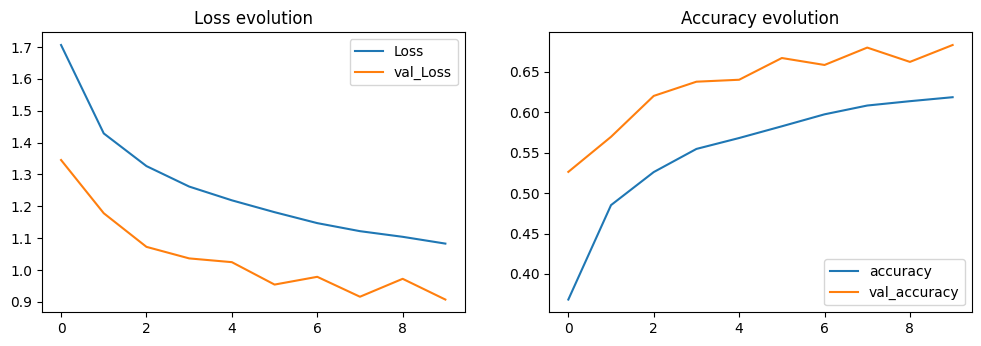

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


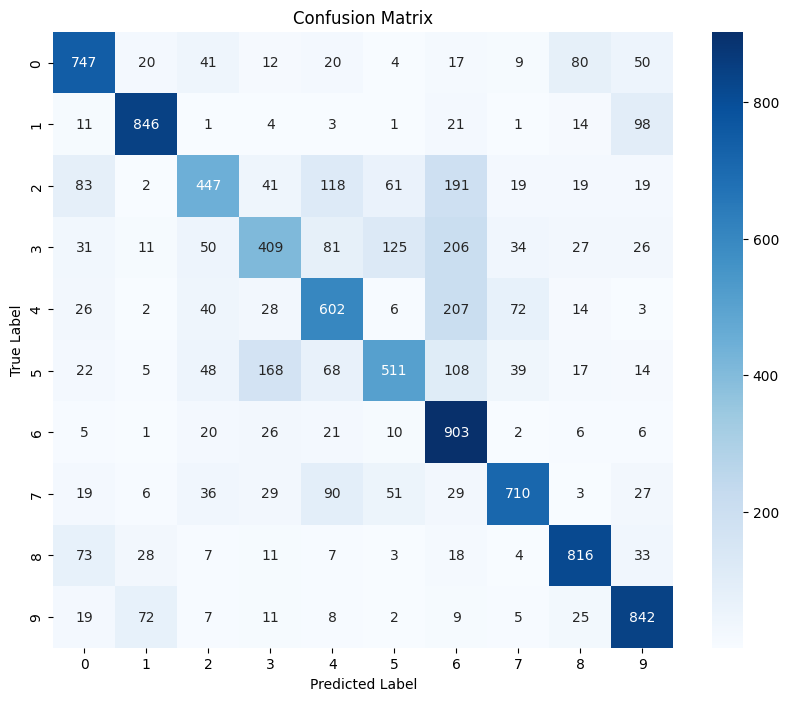

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from google.colab import files
import PIL
from PIL import Image

def upload_and_predict():
    uploaded = files.upload()  # Upload file
    for file_name in uploaded.keys():
        img = Image.open(file_name).convert('RGB')  # Open and convert to RGB
        img = img.resize((32, 32))  # Resize to match CIFAR-10
        img_array = np.array(img) / 255.0  # Normalize
        img_array = np.expand_dims(img_array, axis=0)

        # Prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        print(f'Predicted class: {class_names[predicted_class]}')

        # Display Image
        plt.imshow(img)
        plt.title(f'Predicted: {class_names[predicted_class]}')
        plt.axis('off')
        plt.show()

Saving premium_photo-1694819488591-a43907d1c5cc.jpg to premium_photo-1694819488591-a43907d1c5cc.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class: dog


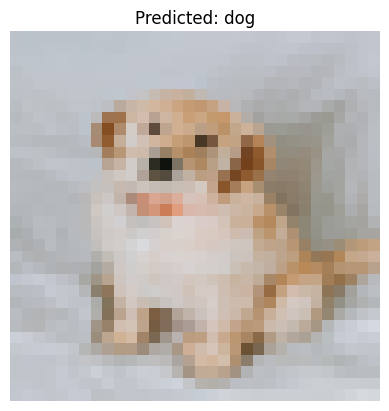

In [ ]:
upload_and_predict()

**Question:**

**Q.** How does using only 10% of the dataset affect model accuracy?

**Soln:**

*   Smaller datasets limit the model’s ability to learn complex patterns.
*   Less data leads to low generalization and lower validation accuracy(46%) than the whole dataset(70%).

---
**Q.**What strategies can improve accuracy with limited data?

**Soln:**

1.   We can use stronger augmentations to increase the dataset diversity leading to better generalization.
2.   We can use Transfer learning to improve the performance.
3. Increasing the number of epoches.
4. Using regularization.

---







# Part 2: Clustering on the Iris Dataset

**Task 2**:  *Apply K-Means Clustering on the Iris Dataset*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
iris=load_iris()

In [ ]:
X=iris.data
y=iris.target
feature_names=iris.feature_names
target_name=iris.target_names

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**EDA**

In [ ]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
df=pd.DataFrame(X,columns=feature_names)
df['species']=y

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [ ]:
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


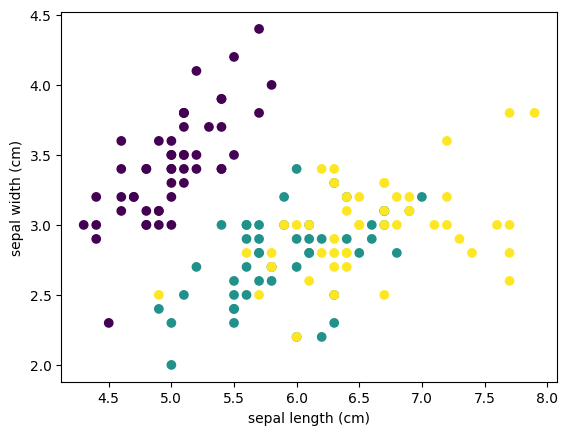

In [ ]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['species'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

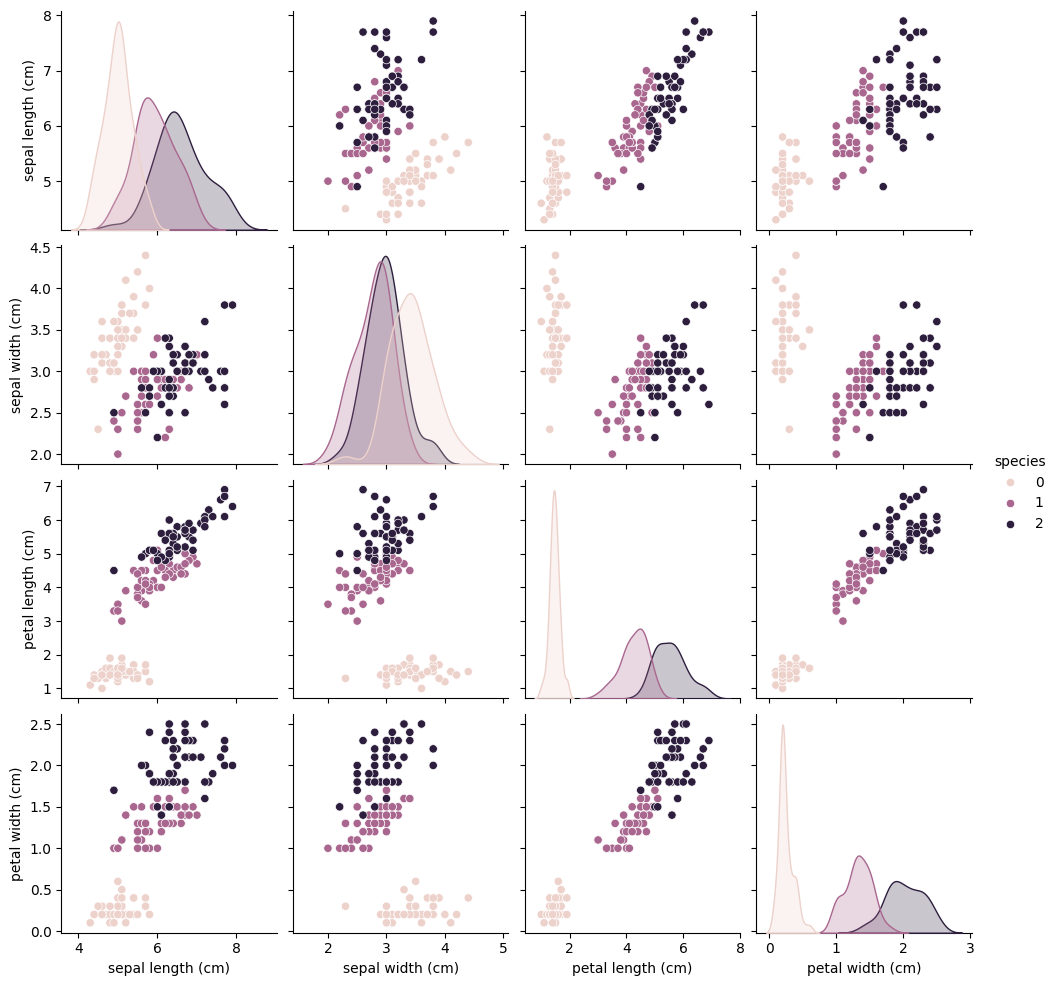

In [ ]:
sns.pairplot(df, hue='species')
plt.show()

In [ ]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [ ]:
X[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

**Model Training**

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=42,n_init='auto')
y_means=kmeans.fit_predict(X)

In [ ]:
y_means

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

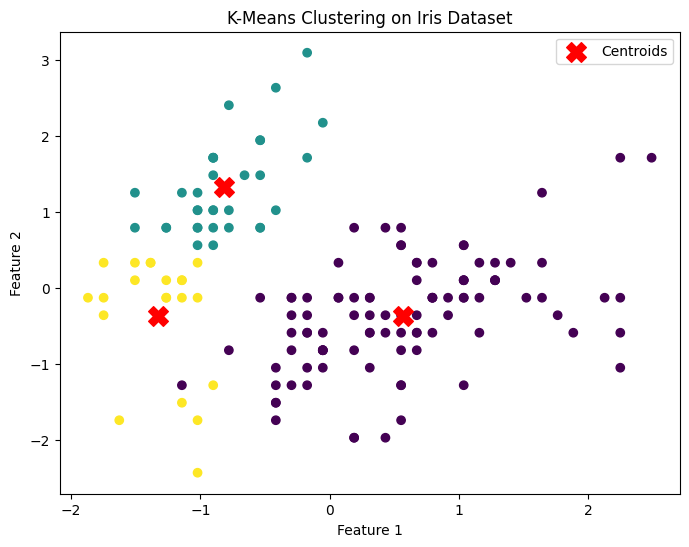

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_means, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

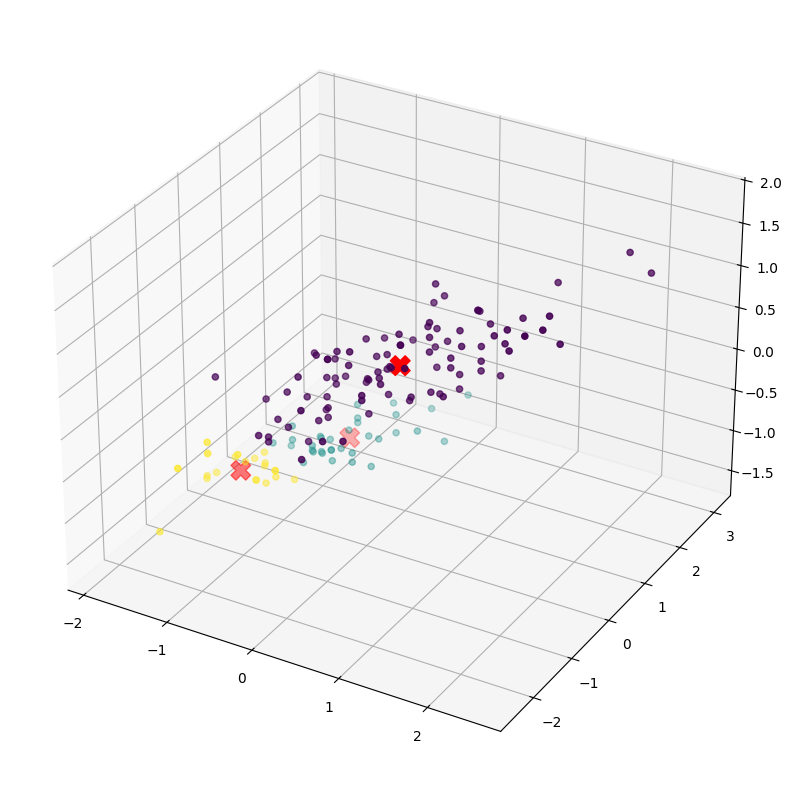

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_means, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='X', label='Centroids')

In [ ]:
import plotly.express as px
fig=px.scatter_3d(x=X[:,0],y=X[:,1],z=X[:,2],color=y_means)
fig.show()

In [ ]:
inertia=[]
k_values=range(1,6)

for k in k_values:
  kmeans= KMeans(n_clusters=k,random_state=42,n_init='auto')
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

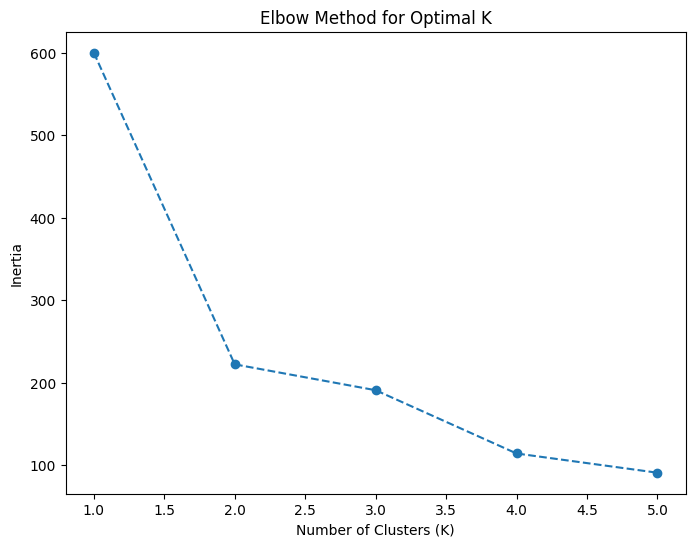

In [ ]:
# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()



---

**Task 3:** *Hierarchical Clustering on the Iris Dataset*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster,ward
from scipy.spatial.distance import pdist
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import BisectingKMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [ ]:
iris=load_iris()

In [ ]:
X=iris.data
y=iris.target
feature_names=iris.feature_names
target_name=iris.target_names

In [ ]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [ ]:
linkage_matrix_single = linkage(X, method='single')
linkage_matrix_complete = linkage(X, method='complete')


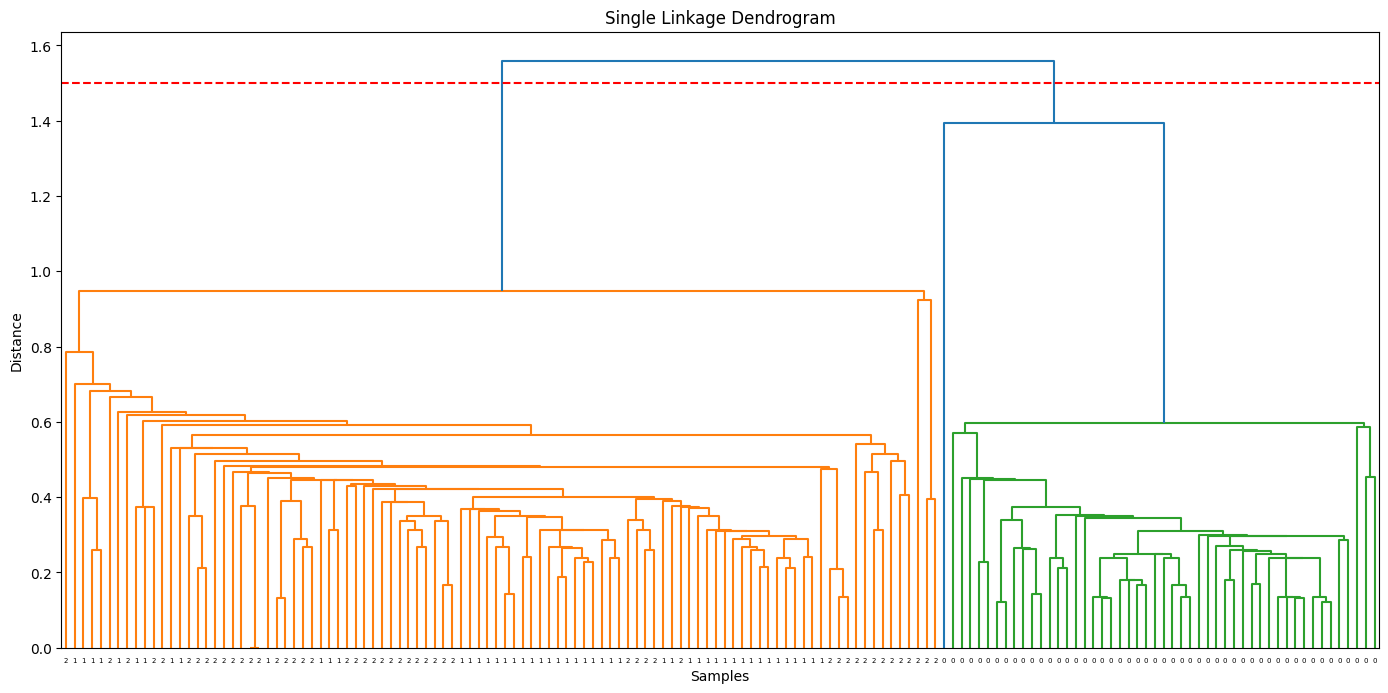

In [ ]:
plt.figure(figsize=(17, 8))
dendrogram(linkage_matrix_single, labels=y,leaf_rotation=0)
plt.title("Single Linkage Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()

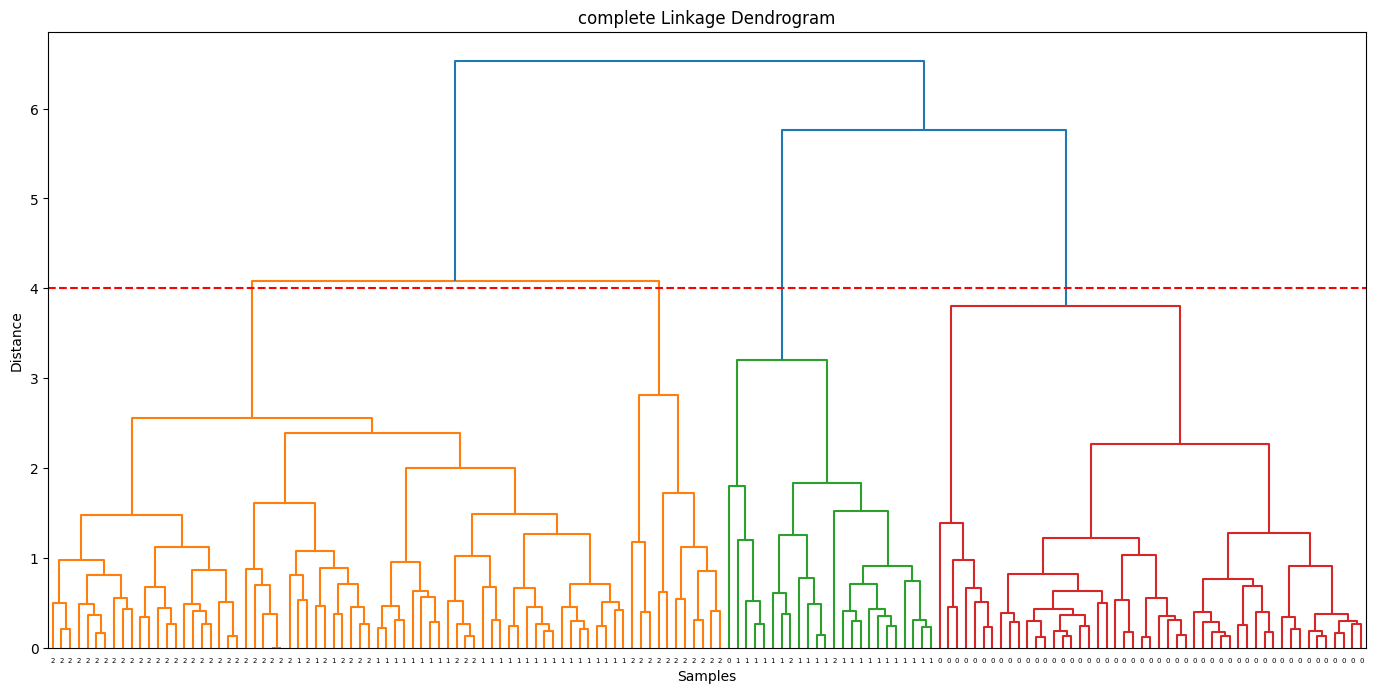

In [ ]:
plt.figure(figsize=(17, 8))
dendrogram(linkage_matrix_complete, labels=y,leaf_rotation=0)
plt.title("complete Linkage Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.axhline(y=4, color='r', linestyle='--')
plt.show()

In [ ]:
agglo_cluster=AgglomerativeClustering(n_clusters=3,linkage='complete')
y_means_agglo=agglo_cluster.fit_predict(X)

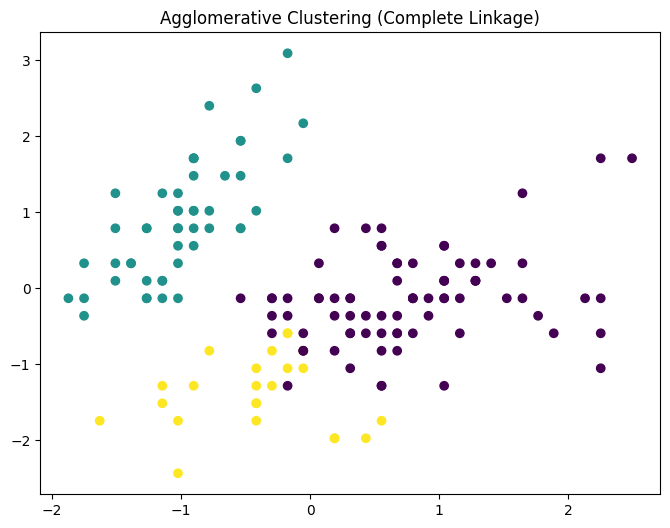

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_means_agglo, cmap='viridis')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()

In [ ]:
import plotly.express as px
fig=px.scatter_3d(x=X[:,0],y=X[:,1],z=X[:,2],color=y_means_agglo)
fig.show()

In [ ]:
divisive_cluster=BisectingKMeans(n_clusters=3,random_state=42)
y_means_divisive=divisive_cluster.fit_predict(X)

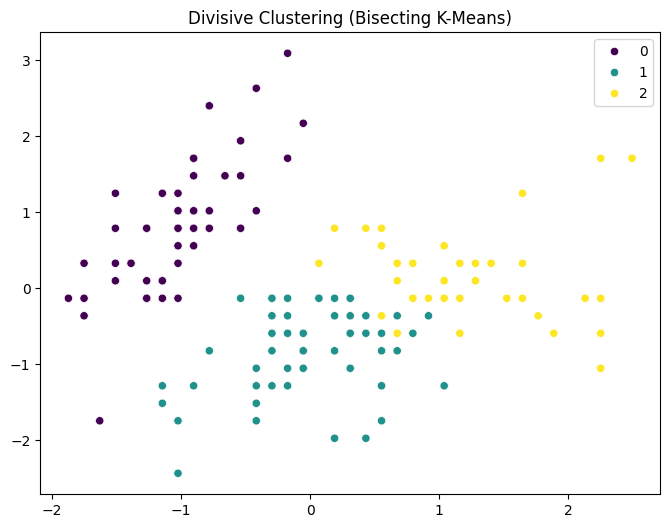

In [ ]:
# Visualizing Divisive Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_means_divisive, palette='viridis')
plt.title("Divisive Clustering (Bisecting K-Means)")
plt.show()

In [ ]:
fig=px.scatter_3d(x=X[:,0],y=X[:,1],z=X[:,2],color=y_means_divisive)
fig.show()

In [ ]:
divisive_silhouette = silhouette_score(X, y_means_divisive)
agglomerative_silhouette = silhouette_score(X, y_means_agglo)
divisive_ari = adjusted_rand_score(y, y_means_divisive)
agglomerative_ari = adjusted_rand_score(y, y_means_agglo)

print("\nDivisive vs Agglomerative Clustering Comparison:")
print(f"Divisive Silhouette Score: {divisive_silhouette:.3f}")
print(f"Divisive Adjusted Rand Index: {divisive_ari:.3f}")
print(f"Agglomerative Silhouette Score: {agglomerative_silhouette:.3f}")
print(f"Agglomerative Adjusted Rand Index: {agglomerative_ari:.3f}")


Divisive vs Agglomerative Clustering Comparison:
Divisive Silhouette Score: 0.463
Divisive Adjusted Rand Index: 0.592
Agglomerative Silhouette Score: 0.450
Agglomerative Adjusted Rand Index: 0.573


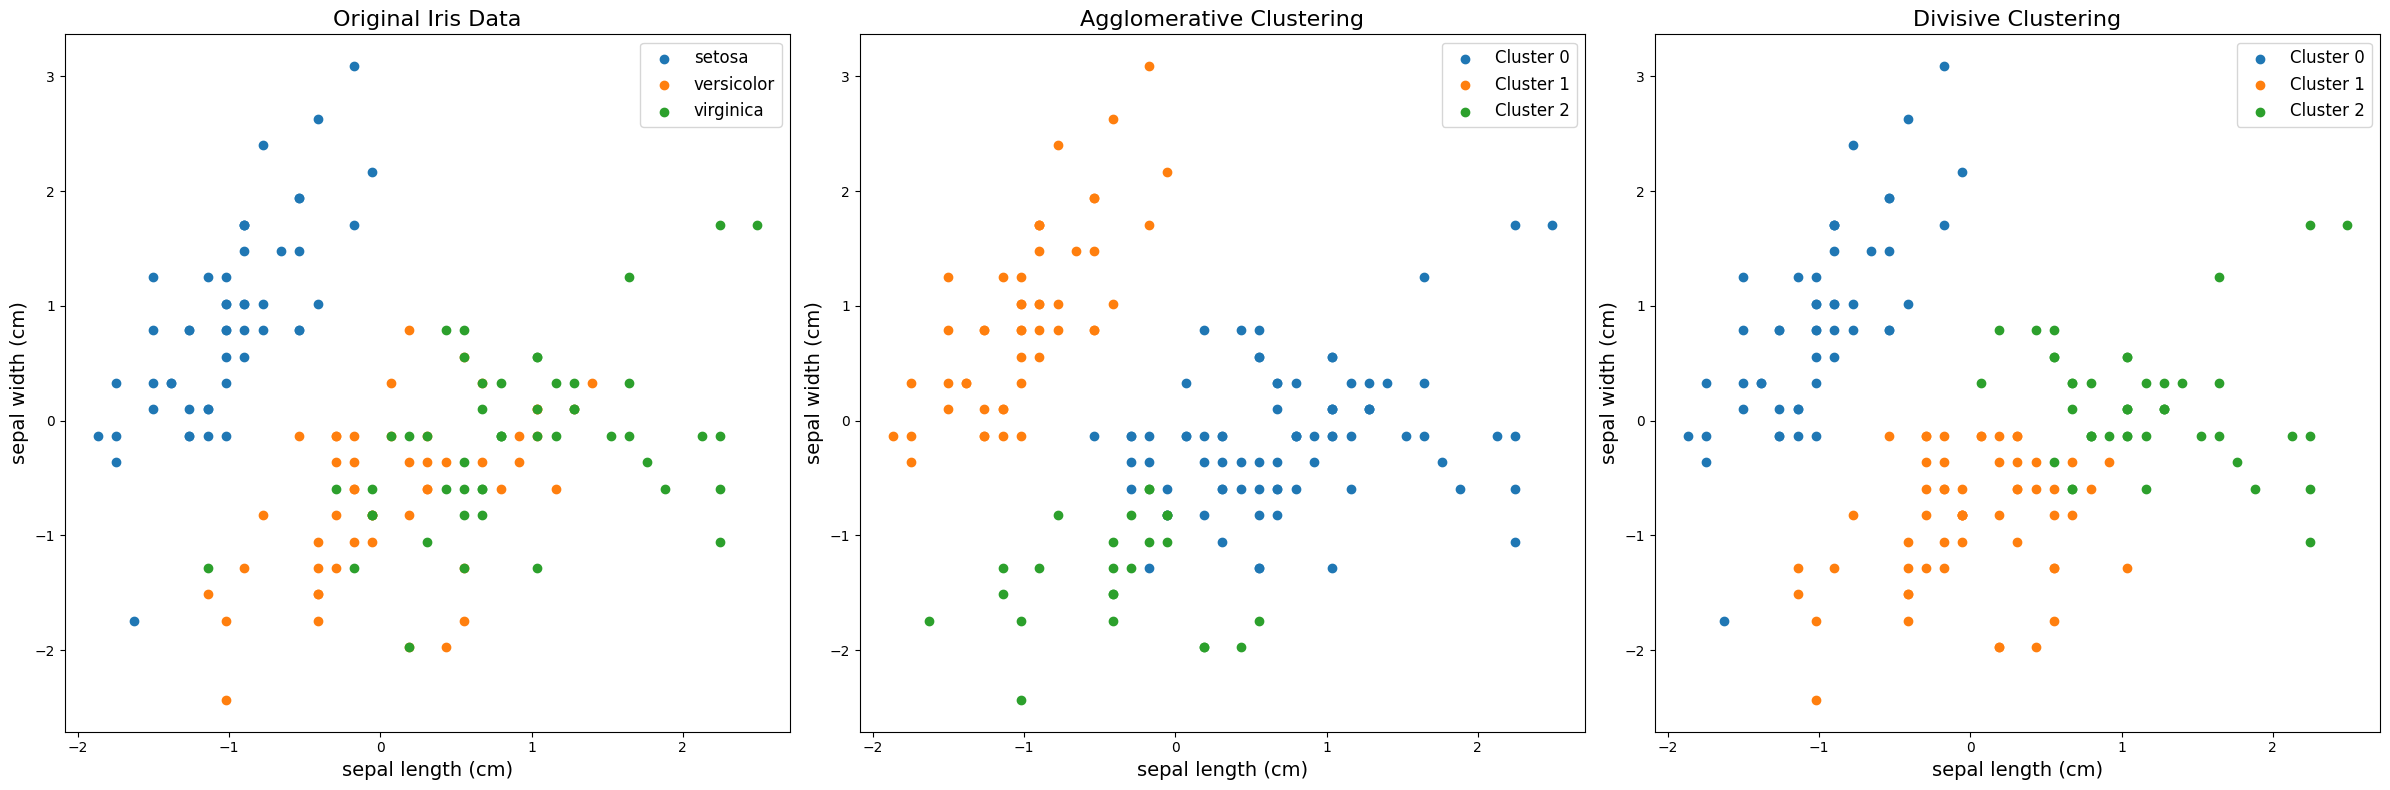

In [ ]:
plt.figure(figsize=(24, 8))

# Original data with true labels
plt.subplot(1, 3, 1)
for i, label in enumerate(target_name):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=label)
plt.title('Original Iris Data', fontsize=16)
plt.xlabel(feature_names[0], fontsize=14)
plt.ylabel(feature_names[1], fontsize=14)
plt.legend(fontsize=12)

# Agglomerative clustering results
plt.subplot(1, 3, 2)
for i in range(3):
    plt.scatter(X[y_means_agglo == i, 0], X[y_means_agglo == i, 1], label=f'Cluster {i}')
plt.title('Agglomerative Clustering', fontsize=16)
plt.xlabel(feature_names[0], fontsize=14)
plt.ylabel(feature_names[1], fontsize=14)
plt.legend(fontsize=12)

# Divisive clustering results
plt.subplot(1, 3, 3)
for i in range(3):
    plt.scatter(X[y_means_divisive == i, 0], X[y_means_divisive == i, 1], label=f'Cluster {i}')
plt.title('Divisive Clustering', fontsize=16)
plt.xlabel(feature_names[0], fontsize=14)
plt.ylabel(feature_names[1], fontsize=14)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


**Questions:**

**Q1.** How does changing K in K-Means affect clustering results?

**Soln:**

*   When k is too small, inertia is very high which means poor clustering.
*   The elbow point is good choice of K. In our case it is 3.

*   If k is too large, clusters may be too specific,leading to meaningless division. Low inertia but do not generalizes well.




---

**Q2.** How does top-down (divisive) clustering compare with bottom-up (agglomerative) clustering?

**Soln:**

1.   Divisive Clustering achieves a slightly higher Silhouette Score and Adjusted Rand Index, indicating better-defined and more accurate clusters.
2.   Divisive Clustering maintains a structure closer to the original Iris species distribution, while Agglomerative Clustering struggles slightly with vercicolor and mixes some data points.


---

**Q3.**	How do these clustering methods differ in terms of computational complexity and scalability?

**Soln:**


1.   K-Means:
    *   *Complexity:* Overall complexity is O(nkT), where n is the number of data points, k is the number of clusters, and T is the number of iterations.Each iteration requires reassigning points to clusters (O(nk)) and updating centroids (O(n)).

    *  *Scalability:*Scales well for large datasets, especially with optimizations like Mini-Batch K-Means or parallel processing.

2.  Agglomerative Clustering:
    *   *Complexity:* Overall complexity is O(n^2 log n) or O(n^3), depending on the linkage method used.Starts with individual points and merges them iteratively.

    *  *Scalability:* Does not scale well for large datasets because of high complexity.
  
3.  Divisive Clustering:
    *   *Complexity:* More efficient than agglomerative, with complexity close to O(n log n) if K-Means is used for splitting.Splits clusters recursively, often using techniques like Bisecting K-Means.

    *  *Scalability:* More scalable than agglomerative but less than K-Means; performance depends on the splitting strategy.


---
**Q4.**	Which Method Produces Better-Defined Clusters?

**Soln:** Divisive Clustering produces the most well-defined clusters in this case.


---
**Q5.**		How do they differ in performance and results?

**Soln:**
1.   K-Means:
    *   It is faster as compared to hierarchical methods, specially for large datasets.
    *  It forms spherical clusters (works well if clusters are well-separated).It might struggle with non-spherical clusters (e.g., complex shapes).

2.   Agglomerative Clustering:
    *   It is slower as it computes pairwise distances at each step.Not scalable for large datasets.
    *  Preserves hierarchy, meaning we can cut at different levels to get different numbers of clusters. Better results than K-means.


 3.  Divisive Clustering:
    *   It is more efficient than Agglomerative but still slower than K-Means.Works better in cases where a top-down split is meaningful.

    *  It produces well-separated clusters, as it keeps splitting the data from the top-down. More interpretable hierarchical structure than Agglomerative.Computationally expensive but often gives better-defined clusters.


